In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime
import glob

import os
# import cPickle as pickle

import seaborn as sns
sns.set_style("whitegrid")

In [3]:
def generate_default_plot_env():
    sns.set(font_scale=1.4, style="whitegrid")
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rc('font', family='sans-serif') 
    matplotlib.rc('font', serif='Helvetica Neue') 
    matplotlib.rc('text', usetex='false') 
    matplotlib.rcParams.update({'font.size': 22})
    
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rc('font', family='sans-serif') 
    plt.rc('font', serif='Helvetica Neue') 
    plt.rc('text', usetex='false') 
    plt.rcParams.update({'font.size': 22})

generate_default_plot_env()

In [4]:
scatter_df = pd.read_csv("../data/hours_used_diff.csv", header=[0, 1])

In [5]:
scatter_df.columns = ['_'.join(col).strip() for col in scatter_df.columns.values[:-2]] + ["hours_used_diff", "ws_diff"]
scatter_df.head()

,hours_used_post,hours_used_pre,hours_used_diff,ws_diff
0,12.971739,17.720139,-4.748400,51.0
1,8.452778,12.800000,-4.347222,44.0
2,14.515152,13.412667,1.102485,36.0
3,14.062821,13.854545,0.208275,-36.0
4,10.811111,11.801333,-0.990222,7.0


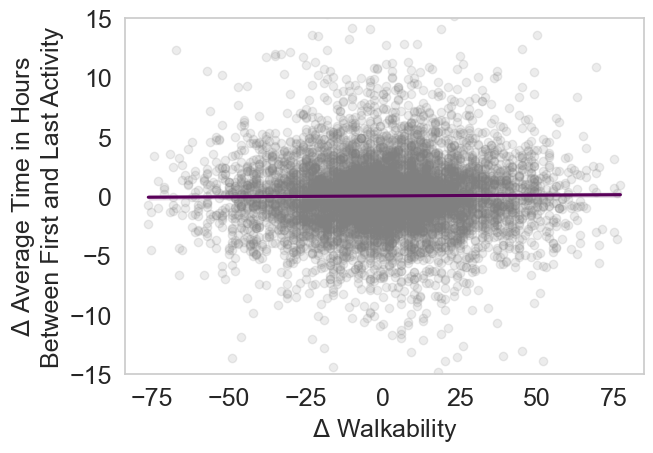

In [6]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.regplot(x=scatter_df['ws_diff'], y=scatter_df['hours_used_diff'], ax=ax,
            scatter_kws={'color': "grey", 'alpha': 0.15}, line_kws={'color': '#590059'});
ax.set_ylim(-15, 15);
ax.grid(False);
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18);
plt.ylabel('$\Delta$ Average Time in Hours\nBetween First and Last Activity');
plt.xlabel('$\Delta$ Walkability');
plt.tight_layout()
plt.savefig('../output/fig17b.pdf', dpi=300)